# An example how to systematically run VQE boosting by DBQA


[Qibo 0.2.9|INFO|2024-06-24 15:46:07]: Using numpy backend on /CPU:0
[Qibo 0.2.9|INFO|2024-06-24 15:46:08]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


1
Initilizing gci:

In the VQE numpy
The gci mode is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field as the oracle.

The target energy is -15.28
The VQE energy is -14.56 
The DBQA energy is -14.56. 
The difference is for VQE is 0.72 
and for the DBQA 0.72 
which can be compared to the spectral gap 1.09.
The relative difference is 
    - for VQE 4.69% 
    - for DBQA 4.69%.
The energetic fidelity witness of the ground state is: 
    - for the VQE  0.34 
    - for DBQA 0.34
The true fidelity is 
    - for the VQE  0.52
    - for DBQA 0.52
                
The boosting circuit used 0 CNOT gates coming from compiled XXZ evolution and 30 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 3.0 and n_CZ/n_qubits = 0.0


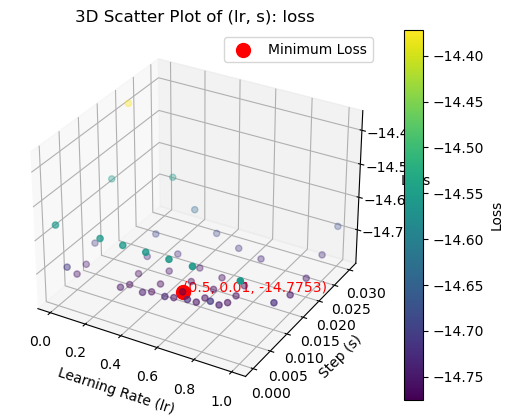

Just finished the selection: better loss -14.775307501315968 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.010005, and eo_d name = B Field
Executing gci step 1:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.010005.
--- the report after execution:

The target energy is -15.28
The VQE energy is -14.56 
The DBQA energy is -14.78. 
The difference is for VQE is 0.72 
and for the DBQA 0.5 
which can be compared to the spectral gap 1.09.
The relative difference is 
    - for VQE 4.69% 
    - for DBQA 3.28%.
The energetic fidelity witness of the ground state is: 
    - for the VQE  0.34 
    - for DBQA 0.34
The true fidelity is 
    - for the VQE  0.52
    - for DBQA 0.59
                
The boosting circuit used 90 CNOT gates coming from compiled XXZ evolution and 150 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 15.0 and n_CZ/n_qub

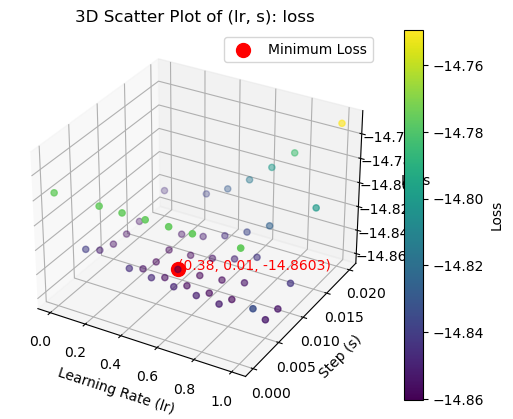

Just finished the selection: better loss -14.86026227554412 for mode DoubleBracketRotationType.group_commutator_third_order_reduced,                  with duration s=0.010005, and eo_d name = B Field
Executing gci step 2:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.010005.
--- the report after execution:

The target energy is -15.28
The VQE energy is -14.56 
The DBQA energy is -14.86. 
The difference is for VQE is 0.72 
and for the DBQA 0.42 
which can be compared to the spectral gap 1.09.
The relative difference is 
    - for VQE 4.69% 
    - for DBQA 2.72%.
The energetic fidelity witness of the ground state is: 
    - for the VQE  0.34 
    - for DBQA 0.34
The true fidelity is 
    - for the VQE  0.52
    - for DBQA 0.65
                
The boosting circuit used 540 CNOT gates coming from compiled XXZ evolution and 750 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 75.0 and n_CZ/n_qu

In [1]:
from boostvqe.utils import *

outputs = []    
gci_eval_counter = 1
dict_params = []
for nqubits in [10]:
    for nlayers in [3]:
        for seed in [42]:
            for target_epoch in [2000]:
                for eo_d in get_eo_d_initializations(nqubits)[0:1]:
                    mode_dbr_list =[#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            #DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]
                    dict_params.append( dict(
                        nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch,
                        nmb_gci_steps = 2,
                        nmb_gd_epochs = 1,
                        eo_d = eo_d,
                        mode_dbr_list = mode_dbr_list,
                        please_be_verbose = True,
                        please_be_visual = True
                    ))
                    
                    print(gci_eval_counter)
                    gci_eval_counter +=1
                    g, bcd = execute_gci_boost( **dict_params[-1] )
                    outputs.append([bcd,dict_params,g])
                    
                        
                    


In [2]:
outputs

[[{0: {'gci_loss': -14.775307501315968,
    'vqe_energy': -14.560174594055583,
    'target_energy': -15.276131122065795,
    'diff_vqe_target': 0.7159565280102118,
    'diff_gci_target': 0.5008236207498271,
    'gap': 1.0876654489812658,
    'diff_vqe_target_perc': 4.6867660554185715,
    'diff_gci_target_perc': 3.278471602187325,
    'fidelity_witness_vqe': 0.3417493139266359,
    'fidelity_witness_gci': 0.3417493139266359,
    'fidelity_vqe': 0.5208736950594399,
    'fidelity_gci': 0.5949620825637701,
    'nmb_cz': 150,
    'nmb_cnot': 90,
    'nmb_cnot_relative': 15.0,
    'nmb_cz_relative': 9.0},
   1: {'gci_loss': -14.86026227554412,
    'vqe_energy': -14.560174594055583,
    'target_energy': -15.276131122065795,
    'diff_vqe_target': 0.7159565280102118,
    'diff_gci_target': 0.41586884652167555,
    'gap': 1.0876654489812658,
    'diff_vqe_target_perc': 4.6867660554185715,
    'diff_gci_target_perc': 2.7223440490175466,
    'fidelity_witness_vqe': 0.3417493139266359,
    'fidel